In [88]:
!pip install --user matplotlib




[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import cv2
import urllib
import numpy as np
import matplotlib.pyplot as plt

# Input your image
I'm using an online example. You should import the different test cases provided.

In [35]:
img1 = cv2.imread('14-Sine.jpg')

if img1 is not None:
    img_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

else:
    print("unable to read")

In [36]:
# Switch between the following two samples if you want to see different examples
# req = urllib.request.urlopen('https://th.bing.com/th/id/OIP.7DVS2NnborRqWtxdJVK2GAHaJ4?w=3024&h=4032&rs=1&pid=ImgDetMain')

#https://aishack.in/static/img/tut/sudoku-original.jpg
#https://sources.roboflow.com/dcbM99GUgvVCEMo4F2rq8vaVApB2/DSJGI2e7g77XqctWIGQG/original.jpg
#https://th.bing.com/th/id/OIP.jBUdypHLT_QgxqIb-ZYzNwHaFj?w=2304&h=1728&rs=1&pid=ImgDetMain
#https://th.bing.com/th/id/OIP.R2FXM2QBD9FssNJGftJ2LwHaJ4?w=864&h=1152&rs=1&pid=ImgDetMain
#https://th.bing.com/th/id/OIP.Altpl_JzS-TN8bAcpQYtSwAAAA?pid=ImgDet&w=186&h=329&c=7&dpr=1.3
#https://www.asianscientist.com/wp-content/uploads/bfi_thumb/Sudoku-Saves-Photographers-From-Copyright-Theft-2v598pitnw2vs3a6bz0yyo.jpg


# arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
# img = cv2.imdecode(arr, -1) # 'Load it as it is'
img_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

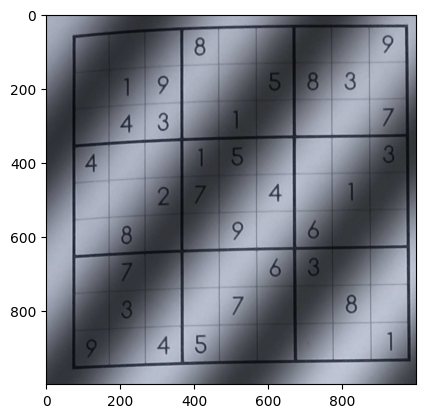

In [83]:
plt.imshow(img_rgb);

# Convert to grayscale
We don't need any color information.

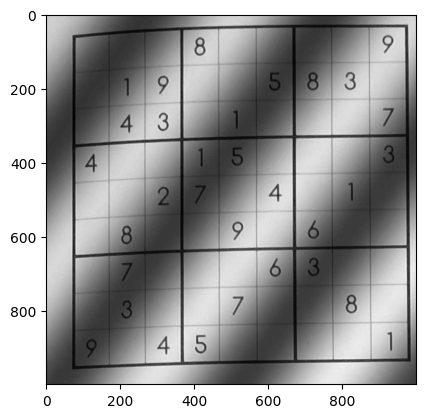

In [84]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap="gray");

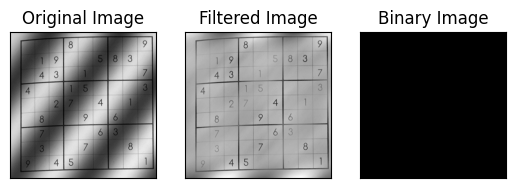

In [95]:


# Assuming you have your image loaded into 'img_rgb'
# If not, load it using cv2.imread()

# Convert the image to grayscale
imgGray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

# Apply Fourier Transform
f_transform = np.fft.fft2(imgGray)
f_transform_shifted = np.fft.fftshift(f_transform)

# Identify the frequency corresponding to the diagonal sine wave
# This may require visual inspection of the magnitude spectrum
# and finding the frequency peaks corresponding to the sine wave
# For simplicity, let's assume it's a 45-degree sine wave

# Set the frequency of the sine wave to be removed
sine_wave_frequency = 10  # Adjust this value based on your observation

# Create a mask to filter out the sine wave frequency along the diagonal
rows, cols = imgGray.shape
crow, ccol = rows // 2, cols // 2

# Create a mask to filter out the sine wave frequency along the diagonal
mask = np.zeros((rows, cols), np.uint8)
cv2.line(mask, (ccol - sine_wave_frequency, crow - sine_wave_frequency),
         (ccol + sine_wave_frequency, crow + sine_wave_frequency), 1, thickness=2)

# Apply the mask to the Fourier Transform
f_transform_shifted = f_transform_shifted * (1 - mask)

# Apply the Inverse Fourier Transform to get the filtered image
f_transform_inverse = np.fft.ifftshift(f_transform_shifted)
imgFiltered = np.fft.ifft2(f_transform_inverse).real

# Apply global threshold to convert the image to binary
_, imgBinary = cv2.threshold(imgFiltered, 127, 255, cv2.THRESH_BINARY)

# Display the original, filtered, and binary images
plt.subplot(131), plt.imshow(imgGray, cmap="gray")
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(imgFiltered, cmap="gray")
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(imgBinary, cmap="gray")
plt.title('Binary Image'), plt.xticks([]), plt.yticks([])

plt.show()


In [85]:
img_gray_equalized = cv2.equalizeHist(img_gray)
img_gray_blurred = cv2.GaussianBlur(img_gray_equalized, (3, 3), 0) 


# Thresholding step
We don't need the full scale of grayscale either, just binary. But, is ordinary thresholding enough? Or is "adaptive thresholding" better?

Do your research!


### Adaptive Thresholding is better because it will adapt to the change of light intensity along the image as we see here global thresholding will alaways result in losing some of the image due to the change of light intensity along the image

Text(0.5, 1.0, 'Global Thresholding')

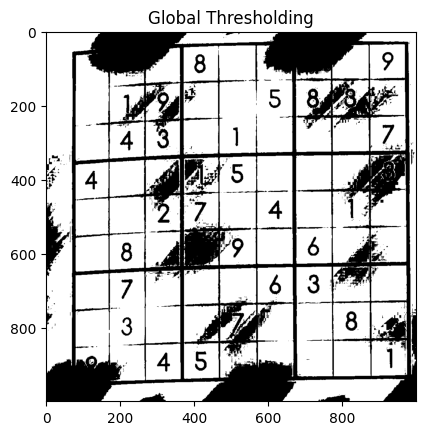

In [86]:
_, img_gray_global_threshed = cv2.threshold(imgFiltered, 70, 255, cv2.THRESH_BINARY_INV)
plt.imshow(img_gray_global_threshed, cmap='gray')
plt.title('Global Thresholding') 

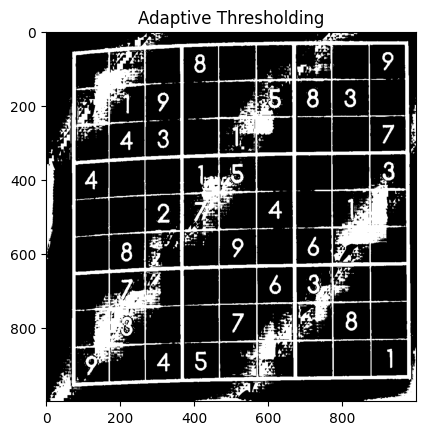

In [87]:
img_gray_threshed = cv2.adaptiveThreshold(src=img_gray,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=111,
    C=5
)
plt.title('Adaptive Thresholding') 
plt.imshow(img_gray_threshed, cmap="gray");

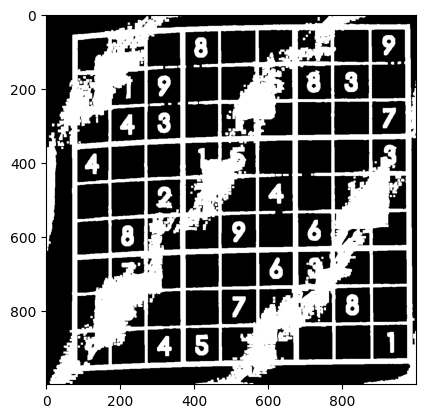

In [88]:
####################ADDED just trying some morphological methods################
kernel1 =np.ones((2,2),np.uint8)
dilation=cv2.dilate(img_gray_threshed,kernel1,iterations=5)
erosion=cv2.erode(dilation,kernel1,iterations=1)
closing =cv2.morphologyEx(img_gray_threshed,cv2.MORPH_CLOSE,kernel1,iterations=1)
opeining =cv2.morphologyEx(dilation,cv2.MORPH_OPEN,kernel1,iterations=1)
erosion=cv2.erode(opeining,kernel1,iterations=2)
plt.imshow(dilation,cmap="gray")

# Detect the lines
One way is to use Hough transform. It may not be the best way, there are other ways, and I've done zero noise removal in this guide so far.

This is very sub-optimal and will most likely not work reliably on all cases. Do your research!

### Enhancement : One way is getting the biggest contour in the image 

In [89]:

# # Create a sharpening kernel
# kernel = np.array([[-1, -1, -1],
#                    [-1, 9, -1],
#                    [-1, -1, -1]])

# # Apply the kernel to the image
# imgSharpened = cv2.filter2D(img_gray, -1, kernel)

# # Display the original and sharpened images




# img_gray_threshed = cv2.adaptiveThreshold(src=imgSharpened,
#     maxValue=255,
#     adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,
#     thresholdType=cv2.THRESH_BINARY_INV,
#     blockSize=111,
#     C=5
# )
# plt.title('Adaptive Thresholding') 
# plt.imshow(img_gray_threshed, cmap="gray");


# Convert the image to grayscale if it's in color


# Calculate the minimum and maximum intensity values
# min_intensity = np.min(img_rgb)
# max_intensity = np.max(img_rgb)

# # Perform contrast stretching
# imgContrastStretched = cv2.normalize(img_rgb, None, 0, 255, cv2.NORM_MINMAX)

# plt.imshow(imgContrastStretched);
# img_gray = cv2.cvtColor(imgContrastStretched, cv2.COLOR_RGB2GRAY)
# plt.imshow(img_gray, cmap="gray");


In [90]:
####################ADDED################
def biggestContour (contours):
    biggest=np.array([])
    max_area=0
    for i in contours:
        area=cv2.contourArea(i)
        if area> 50:
            peri=cv2.arcLength(i,True)
            approx=cv2.approxPolyDP(i,0.02*peri,True)
            if area > max_area and len(approx)==4:
                biggest=approx
                max_area=area
    return biggest,max_area
def reorder(myPoints):
    myPoints=myPoints.reshape((4,2))
    myPointsNew=np.zeros((4,1,2),dtype=np.int32)
    add=myPoints.sum(1)
    myPointsNew[0]=myPoints[np.argmin(add)]
    myPointsNew[3]=myPoints[np.argmax(add)]
    diff=np.diff(myPoints,axis=1)
    myPointsNew[1]=myPoints[np.argmin(diff)]
    myPointsNew[2]=myPoints[np.argmax(diff)]
    return myPointsNew
    
    

### Outer frame corners identification

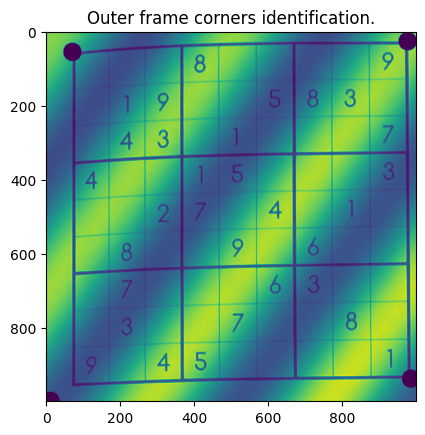

In [91]:
####################ADDED################
heightImg=600
widthImg=600
imgContours=img_gray.copy()
imgBigContour=img_gray.copy()
contours, hierarchy, =cv2.findContours(img_gray_threshed,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(imgContours,contours,-1,(0,0,0),10)
biggest,maxArea=biggestContour(contours)
if biggest.size !=0:
    biggest=reorder(biggest)
    cv2.drawContours(imgBigContour,biggest,-1,(0,255,0),50)
    pts1=np.float32(biggest)
    pts2=np.float32([[0,0],[widthImg,0],[0,heightImg],[widthImg,heightImg]])
    matrix=cv2.getPerspectiveTransform(pts1,pts2)
    imgWrapedgrey=cv2.warpPerspective(img_gray,matrix,(widthImg,heightImg))
    # imgDetectedDigits=imgBlank.copy()
    # imgWrapedColored=cv2.cvtColor(imgWarpColored,cv2.COLOR_BGR2GRAY)
plt.title('Outer frame corners identification.') 
plt.imshow(imgBigContour)

## Image warpping (Outer frame isolation)

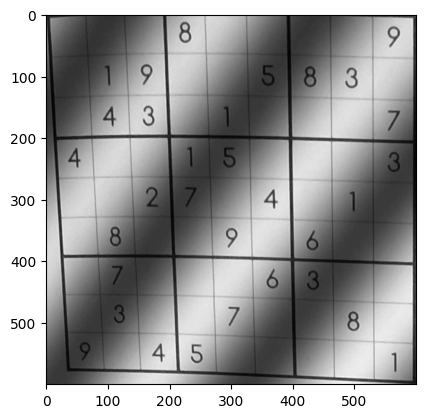

In [92]:
####################ADDED################
plt.imshow(imgWrapedgrey,cmap="gray")

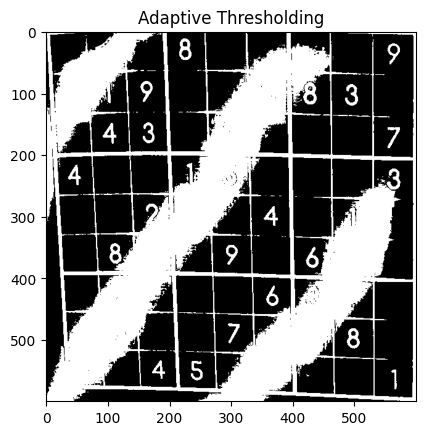

In [93]:
####################ADDED################

img_gray_threshed = cv2.adaptiveThreshold(src=imgWrapedgrey,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=99,
    C=3
)
plt.title('Adaptive Thresholding') 
plt.imshow(img_gray_threshed, cmap="gray");

# Separate the number tiles
Finally, you get each value in a tile of its own, ready to go to phase 2 (OCR).

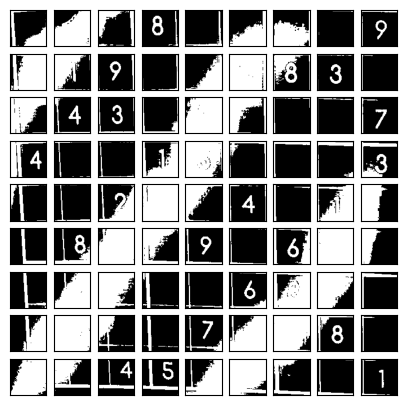

In [94]:
#CHANGED img_gray_threshed_warped to img_gray_threshed

M = img_gray_threshed.shape[0] // 9
N = img_gray_threshed.shape[1] // 9
number_tiles = []
for i in range(9):
    number_tiles.append([])
    for j in range(9):
        tile = img_gray_threshed[i*M:(i+1)*M, j*N:(j+1)*N]
        number_tiles[i].append(tile)

_, axes = plt.subplots(9, 9, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        col.imshow(number_tiles[i][j], cmap="gray");
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)